In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
!pip install mediapipe
import mediapipe as mp
import os
import json
import keras

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 1.3 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.11.23 which is incompatible.


In [ ]:
input_json_path = '/content/drive/Shareddrives/URSI 2022/Eye Tracking ML/json_inputs/'

all_input_json_files = os.listdir(input_json_path)

input_json_data = {}
with open(input_json_path + all_input_json_files[36], 'r') as file:
    s_data = json.load(file)
    input_json_data = {**input_json_data, **s_data}

In [ ]:
calibration_points = [[10, 50], [10, 10], [90, 10], [50, 90],
                   [30, 70], [50, 50], [50, 10], [90, 90],
                   [70, 70], [70, 30], [10, 90], [90, 50],
                   [30, 30]]

In [ ]:
train_y = []

for subject in input_json_data:
    for y in input_json_data[subject]['y']:
        for element in calibration_points:
            train_y.append(element)

print(len(train_y))
#print(train_y)

1170


In [ ]:
train_x = []

for subject in input_json_data:
    for sample in input_json_data[subject]['x']:
        calibration_arr = []
        i = 0
        while (i < 13):
            total_arr = []
            head_pose = np.array(sample[i][0])
            iris_points = np.array(sample[i][1])
            head_pose = head_pose.flatten()
            iris_points = iris_points.flatten()
            #for element in head_pose:
                #total_arr.append(element)
            for element in iris_points:
                total_arr.append(element)
            calibration_arr.append(total_arr)
            i += 1
        #train_x.append(calibration_arr[0])
        for element in calibration_arr:
            train_x.append(element)

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y))

(1170, 16)
(1170, 2)


In [ ]:
val_y = []

for subject in input_json_data:
    for y in input_json_data[subject]['y']:
        val_y.append(y)

In [ ]:
val_x = []

for subject in input_json_data:
    for sample in input_json_data[subject]['x']:
        calibration_arr = []
        i = 0
        while (i <= 13):
            if (i == 13):
                total_arr = []
                head_pose = np.array(sample[i][0])
                iris_points = np.array(sample[i][1])
                head_pose = head_pose.flatten()
                iris_points = iris_points.flatten()
                #for element in head_pose:
                    #total_arr.append(element)
                for element in iris_points:
                    total_arr.append(element)
                calibration_arr.append(total_arr)
            i += 1
        #train_x.append(calibration_arr[0])
        for element in calibration_arr:
            val_x.append(element)

In [ ]:
print(np.shape(val_x))
print(np.shape(val_y))

(90, 16)
(90, 2)


In [ ]:
#train_x = []
#train_y = []

In [ ]:
append_train_x = val_x[:45]
for element in append_train_x:
    train_x.append(element)
val_x = val_x[45:]

append_train_y = (val_y[:45])
for element in append_train_y:
    train_y.append(element)
val_y = val_y[45:]

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y))
print(np.shape(val_x))
print(np.shape(val_y))

(1215, 16)
(1215, 2)
(45, 16)
(45, 2)


In [ ]:
train_x = np.array(train_x)
mean = train_x.mean(axis=0)
train_x -= mean
std = train_x.std(axis=0)
train_x /= std
train_y = np.array(train_y)

val_x = np.array(val_x)
val_x -= mean
val_x /= std
val_y = np.array(val_y)

In [ ]:
print(train_x[1])
print(val_x[1])

[0.6706069111824036, 0.02775724045932293, 2.398131847381592, -0.024143308401107788, 0.06749314069747925, 0.23328343033790588, -0.03579222798099374, -0.014834711172610926, -0.04811606361545767, -0.02389266783897337, -0.05767325604794371, -0.010518245573745366, -0.045410754261257735, -0.0014941452336393324, 0.07374934107961034, -0.010288752354722153, 0.06401576802823655, -0.022689381840219736, 0.05362353493866373, -0.01342694445741388, 0.06334598337012726, -0.0011367565636851706]
[0.7451291680335999, 0.027806444093585014, 2.389636754989624, -0.022740740329027176, 0.09424000978469849, 0.2248876988887787, -0.036025426135467664, -0.013757705207869897, -0.04838497607316594, -0.024120851695308643, -0.05846324052899732, -0.010313824853361964, -0.046177249499393114, 5.049631536757637e-05, 0.07321837873639214, -0.00988507022406937, 0.06358387247426633, -0.02290725264972171, 0.05258430244722967, -0.013091008544257043, 0.06221740881825988, -2.162340210787317e-05]


In [ ]:
from sklearn.utils import shuffle

train_x, train_y = shuffle(train_x, train_y)

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y))

(1215, 16)
(1215, 2)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(128, activation="relu"), layers.Dense(64, activation="relu"), layers.Dense(16, activation="relu"), layers.Dense(2, activation="relu")])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="MeanSquaredError", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=70, batch_size=40000, validation_data=(val_x, val_y))

Epoch 1/70
1/1 [==============================] - 1s 800ms/step - loss: 3329.0613 - mae: 49.7475 - val_loss: 2826.1897 - val_mae: 46.4989
Epoch 2/70
1/1 [==============================] - 0s 36ms/step - loss: 2775.0334 - mae: 43.9471 - val_loss: 1430.0043 - val_mae: 30.3916
Epoch 3/70
1/1 [==============================] - 0s 36ms/step - loss: 1601.4707 - mae: 32.5766 - val_loss: 1297.1105 - val_mae: 29.8870
Epoch 4/70
1/1 [==============================] - 0s 35ms/step - loss: 1835.8766 - mae: 33.8677 - val_loss: 1807.9691 - val_mae: 34.7976
Epoch 5/70
1/1 [==============================] - 0s 38ms/step - loss: 1726.5840 - mae: 33.9086 - val_loss: 1157.1617 - val_mae: 27.8987
Epoch 6/70
1/1 [==============================] - 0s 54ms/step - loss: 1232.9657 - mae: 29.4671 - val_loss: 924.9637 - val_mae: 25.6993
Epoch 7/70
1/1 [==============================] - 0s 44ms/step - loss: 1137.1586 - mae: 28.1887 - val_loss: 968.0704 - val_mae: 26.1736
Epoch 8/70
1/1 [==========================

38/38 [==============================] - 0s 2ms/step


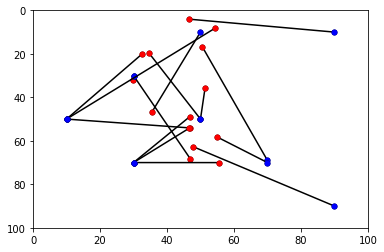

In [ ]:
plt.xlim(0, 100)
plt.ylim(100, 0)
x2 = []
y2 = []
sample_num = 0
while sample_num < 15:
    x = [train_y[sample_num][0]]
    x2 = [(train_y[sample_num][0])]
    x.append(model.predict(train_x)[sample_num][0])
    x3 = [model.predict(train_x)[sample_num][0]]
    y = [train_y[sample_num][1]]
    y2 = [(train_y[sample_num][1])]
    y.append(model.predict(train_x)[sample_num][1])
    y3 = [model.predict(train_x)[sample_num][1]]
    plt.plot(x, y, color="black", marker="o", markersize=5)
    plt.plot(x3, y3, color="red", marker="o", markersize=5)
    plt.plot(x2, y2, color="blue", marker="o", markersize=5)
    sample_num += 1

2/2 [==============================] - 0s 6ms/step


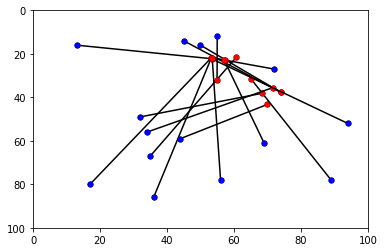

In [ ]:
plt.xlim(0, 100)
plt.ylim(100, 0)
x2 = []
y2 = []
sample_num = 0
while sample_num < 15:
    x = [val_y[sample_num][0]]
    x2 = [(val_y[sample_num][0])]
    x.append(model.predict(val_x)[sample_num][0])
    x3 = [model.predict(val_x)[sample_num][0]]
    y = [val_y[sample_num][1]]
    y2 = [(val_y[sample_num][1])]
    y.append(model.predict(val_x)[sample_num][1])
    y3 = [model.predict(val_x)[sample_num][1]]
    plt.plot(x, y, color="black", marker="o", markersize=5)
    plt.plot(x3, y3, color="red", marker="o", markersize=5)
    plt.plot(x2, y2, color="blue", marker="o", markersize=5)
    sample_num += 1



In [ ]:
val_x[1]

array([ 0.47941471,  0.83456397,  0.17292952,  0.05415567, -0.22015034,
       -0.74408179,  1.13385217, -0.61436258,  0.89315174, -0.87551016,
        0.63278164, -0.80903028,  0.88103176, -0.45476607,  0.84072528,
       -0.38204272,  0.96450827, -0.62123735,  0.90575852, -0.55563726,
        0.8037689 , -0.20471961])

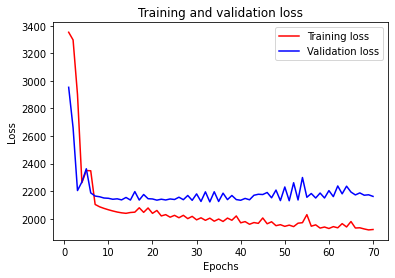

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

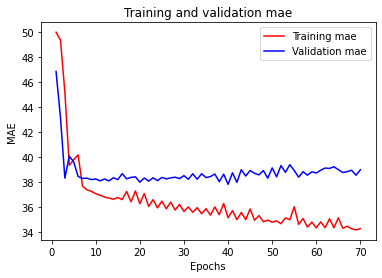

In [ ]:
plt.clf()
acc = history_dict["mae"]
val_acc = history_dict["val_mae"]
plt.plot(epochs, acc, "r", label="Training mae")
plt.plot(epochs, val_acc, "b", label="Validation mae")
plt.title("Training and validation mae")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()